In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
# QUESTION 1.

In [6]:
freq_table = df["category"].value_counts()
freq_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [16]:
top_categories = freq_table.head(5)
top_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

/var/folders/7d/57z_mx2n1qs9p9s3y806bc4h0000gq/T/ipykernel_19105/2926662751.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=freq_table.index, y=freq_table.values, palette="Set3");
/var/folders/7d/57z_mx2n1qs9p9s3y806bc4h0000gq/T/ipykernel_19105/2926662751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_top5 = sns.barplot(x=top_categories.index, y=top_categories.values, palette="Set3");


<Axes: xlabel='category'>

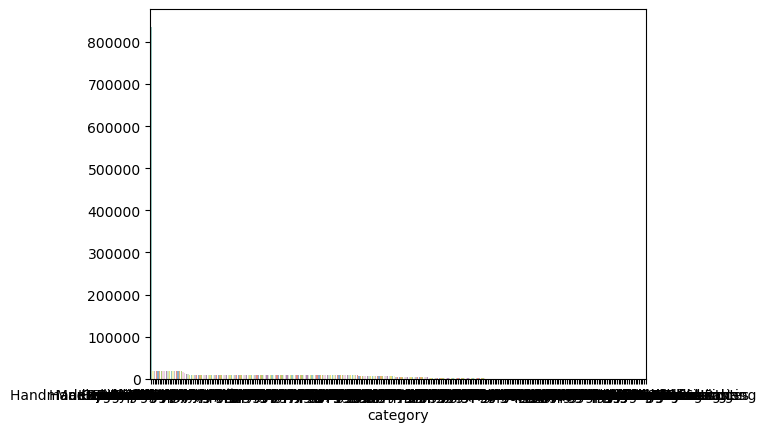

In [24]:
bar_plot = sns.barplot(x=freq_table.index, y=freq_table.values, palette="Set3");
display(bar_plot)


df["category"].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

<Axes: ylabel='count'>

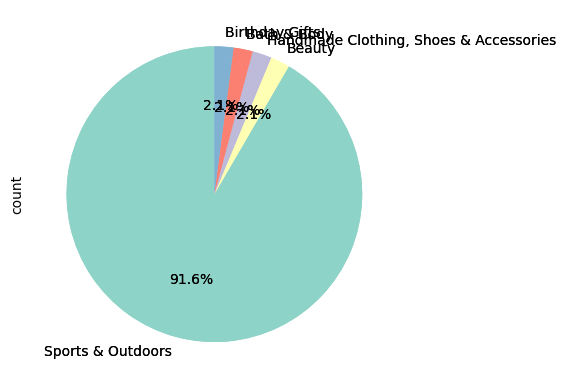

In [33]:
top_categories.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

We can clearly see how "Sports & Outdoors" dominates the listing with almost 91%. 

In [35]:
# QUESTION 2.

In [40]:
df_mean = df["price"].mean()
df_median = df["price"].median()
df_mode = df["price"].mode()
print(f"df_mean : {df_mean}, df_median: {df_median}, df_mode: {df_mode}")

df_mean : 89.24380943923663, df_median: 19.09, df_mode: 0    9.99
Name: price, dtype: float64


Average Price Point (Mean): The average price point of products listed on Amazon UK is approximately £89.24.
This figure gives a sense of the overall pricing level when considering all products in the dataset.
Most Common Price Point (Mode): The most common price point, or mode, is £9.99. 
This means that more products are listed at this price than any other price.
The average price (mean) is significantly higher than the most common price (mode). 
This suggests that while many products are priced around £9.99, there are likely some higher-priced items that are driving the average price up. 
These could be outlier products which indicates a skewed distribution, possibly with a long tail of higher-priced items.

In [42]:
df_var = df["price"].var()
df_std = df["price"].std()
df_range = df["price"].max() - df["price"].min()
df_interquartile_range = df['price'].quantile(0.75)-df['price'].quantile(0.25)
print (f"df_var: {df_var}, df_std: {df_std}, df_range: {df_range}, df_interquartile_range: {df_interquartile_range}") 

df_var: 119445.48532256528, df_std: 345.60886175352226, df_range: 100000.0, df_interquartile_range: 36.0


The combination of a high standard deviation and range indicates a significant spread in product prices.
The large variance and range, coupled with a relatively smaller IQR, suggest that while there are many average-priced items, 
there are also some outliers pushing the mean upwards.

<Axes: xlabel='price', ylabel='Count'>

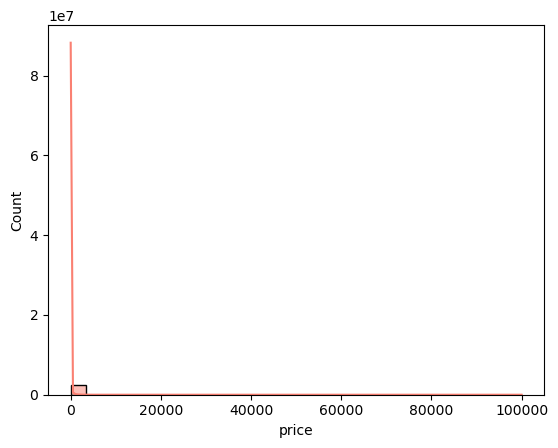

In [45]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

The problems can might be: 
- If the histogram is skewed due to extreme outliers, it can stretch the x-axis and cause the primary 
concentration of data to become compressed.
- Incorrect bin sizes can either over-simplify or over-complicate the data representation.

<Axes: ylabel='price'>

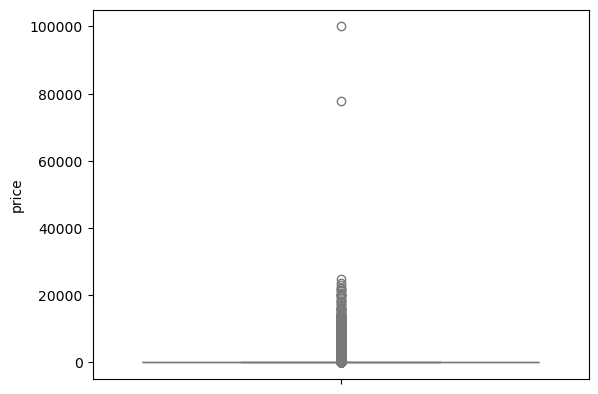

In [46]:
sns.boxplot(data = df['price'], color="lightblue")

There are several outlier points on the higher end of the sale prices, which aligns with our earlier insights about products sold at 
significantly higher prices.

In [47]:
# QUESTION 3.

In [49]:
df_mean = df["stars"].mean()
df_median = df["stars"].median()
df_mode = df["stars"].mode()
print(f"df_mean : {df_mean}, df_median: {df_median}, df_mode: {df_mode}")

df_mean : 2.152836472966065, df_median: 0.0, df_mode: 0    0.0
Name: stars, dtype: float64


With a median and mode of 0, it seems that many products might either not have been rated or have received the lowest possible rating. 
This could indicate issues such as a new dataset, a data collection issue, or simply a wide variety of lesser-known or less popular products.

In [51]:
df_var = df["stars"].var()
df_std = df["stars"].std()
df_interquartile_range = df['stars'].quantile(0.75)-df['stars'].quantile(0.25)
print (f"df_var: {df_var}, df_std: {df_std}, df_interquartile_range: {df_interquartile_range}") 

df_var: 4.81743402976196, df_std: 2.1948653785054697, df_interquartile_range: 4.4


Overall, these metrics indicate a significant variation in customer feedback, showing that products are receiving a wide range of ratings from customers. 
This lack of consistency might suggest that product quality or customer experiences vary greatly across the board, or it might point to diverse customer expectations and perceptions.

In [52]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()
print(f"skewness of the ratings : {skewness_rating}, kurtosis of the ratings: {kurtosis_rating}")

skewness of the ratings : 0.08120735761080985, kurtosis of the ratings: -1.9260061280432985


The ratings appear to be relatively symmetric with respect to skewness, indicating no strong lean towards higher or lower values.
The negative kurtosis suggests a flatter distribution, meaning the ratings don't have as many extreme values as a normal distribution might and are more evenly spread across the scale.

<Axes: xlabel='stars', ylabel='Count'>

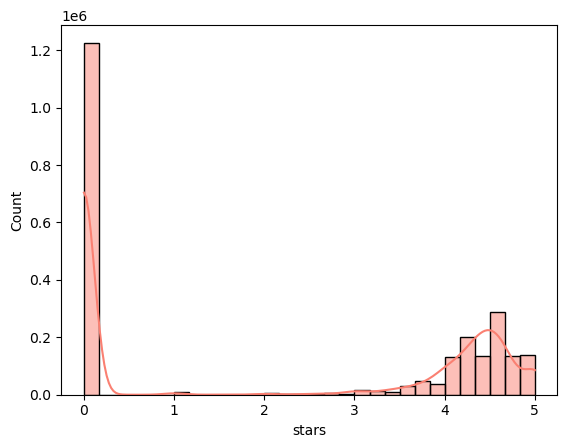

In [53]:
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

as seen before when calculating the measures of centrality and dispersion, the most common rating is 0.